In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
!git clone https://github.com/Honf03/CS114_Data_Final.git

fatal: destination path 'CS114_Data_Final' already exists and is not an empty directory.


In [ ]:
train_data = pd.read_csv('/content/CS114_Data_Final/train.csv')
val_data = pd.read_csv('/content/CS114_Data_Final/val.csv')
test_data = pd.read_csv('/content/CS114_Data_Final/test.csv')

In [ ]:
train_data.head()

,Unnamed: 0.1,Unnamed: 0,No.,Comment,Label
0,259,259,260,giàu vãi cả lồn,1
1,1070,1070,1071,g,0
2,1531,1531,1532,rikaki hq buồn,0
3,1971,1971,1972,"hq thế_giới non lắm, sự_thật đi cháu, vô_địch ...",0
4,2210,2210,2211,khoa quánh veres t sợ,0


In [ ]:
test_data.head()

,Unnamed: 0.1,Unnamed: 0,No.,Comment,Label
0,6218,6218,6219,kệ,0
1,5935,5935,5936,se mấy bữa_nay giả fan trung_lập đi nhục kinh lắm,2
2,5887,5887,5888,NaN,0
3,6898,6898,6899,thầy cổ_vũ,0
4,1404,1404,1405,bình_luận_viên hơi lạnh phải🤣🤣🤣,2


In [ ]:
train_data.drop(train_data.columns[[0, 1, 2]], axis=1, inplace=True)
val_data.drop(val_data.columns[[0, 1, 2]], axis=1, inplace=True)
test_data.drop(test_data.columns[[0, 1, 2]], axis=1, inplace=True)

In [ ]:
train_data['Comment'] = train_data['Comment'].astype(str)
val_data['Comment'] = val_data['Comment'].astype(str)
test_data['Comment'] = test_data['Comment'].astype(str)

In [ ]:
train_data.head()

,Comment,Label
0,giàu vãi cả lồn,1
1,g,0
2,rikaki hq buồn,0
3,"hq thế_giới non lắm, sự_thật đi cháu, vô_địch ...",0
4,khoa quánh veres t sợ,0


In [ ]:
test_data.head()

,Comment,Label
0,kệ,0
1,se mấy bữa_nay giả fan trung_lập đi nhục kinh lắm,2
2,nan,0
3,thầy cổ_vũ,0
4,bình_luận_viên hơi lạnh phải🤣🤣🤣,2


In [ ]:
X_train = train_data['Comment']
y_train = train_data['Label']
X_val = val_data['Comment']
y_val = val_data['Label']
X_test = test_data['Comment']
y_test = test_data['Label']

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Feature extraction using TF-IDF
    ('classifier', RandomForestClassifier(n_estimators=108, max_depth = 400))  # Random Forest Classifier
])


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier',
                 RandomForestClassifier(max_depth=400, n_estimators=108))])

In [ ]:
y_pred = pipeline.predict(X_val)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       608
           1       0.84      0.78      0.81       147
           2       0.62      0.24      0.35        54

    accuracy                           0.90       809
   macro avg       0.79      0.67      0.70       809
weighted avg       0.89      0.90      0.89       809



In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1270
           1       0.73      0.77      0.75       238
           2       0.65      0.22      0.32       111

    accuracy                           0.89      1619
   macro avg       0.77      0.65      0.67      1619
weighted avg       0.88      0.89      0.88      1619



[[1233   34    3]
 [  44  184   10]
 [  53   34   24]]
F1 - micro: 0.8900555898702902
F1 - macro: 0.674602090316376
Accuracy: 0.8900555898702903


<Axes: >

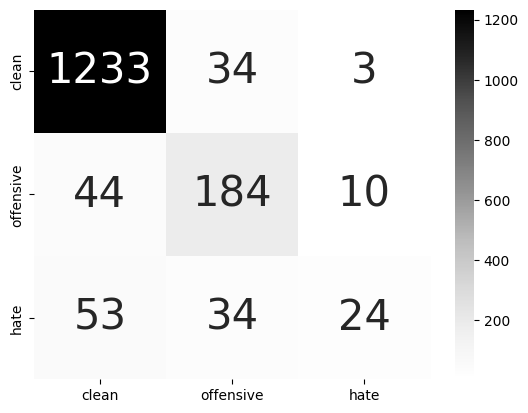

In [ ]:
cf1 = confusion_matrix(y_test, y_pred)
print(cf1)

evaluation = f1_score(y_test, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(y_test, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

evaluation = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(evaluation))

df_cm1 = pd.DataFrame(cf1, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

In [ ]:
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
      print(test_data['Comment'][i], '|',y_pred[i] , '|', y_test[i])

se mấy bữa_nay giả fan trung_lập đi nhục kinh lắm | 0 | 2
bình_luận_viên hơi lạnh phải🤣🤣🤣 | 0 | 2
híu thảo đồ | 0 | 2
who need dev 1 ve: v | 0 | 2
mày đánh lux cặc | 1 | 2
kéo | 1 | 0
??? huy bú | 1 | 2
đặc cầu | 0 | 1
aduvipwa | 0 | 1
bé đần =]] | 1 | 2
zeus non học 369:)))) | 0 | 2
ys cặc | 1 | 2
2 đội gà v | 0 | 2
bọn như cặc già | 1 | 0
rên đi | 0 | 1
nizy nhon vãi lồn =)) | 1 | 2
mấy hề đánh | 0 | 2
quang hải thịt trih trâu | 0 | 2
cưỡi con_bé awesome | 0 | 2
duma rừng | 0 | 1
sài_gòn lạnh chúng_mày chẳng hiểu sao đá | 0 | 2
red hút đá s | 0 | 2
lồn out trình sea | 1 | 0
ngu câm | 2 | 1
moá đánh bắt | 0 | 1
đù 18 | 1 | 0
na hành máy quen =)) | 0 | 2
diana điên | 1 | 2
cứt | 2 | 1
mẹ swap cứu nô_lệ | 1 | 0
lê khánh vô_học | 0 | 2
chấn bé đù | 1 | 2
vcs rác | 0 | 2
ngài điên | 1 | 2
quốc nhục gân đàm | 0 | 1
trụ rồng, chiến_thuật bọn gân đàm | 0 | 2
mé tara ghê | 0 | 1
ana ngáo đá | 0 | 2
đùu | 0 | 1
tật ác | 0 | 1
thắng vua, thua se sủa | 1 | 2
kênh chat toàn trẻ trâu chấp | 0 | 2
